In [1]:
import pandas as pd
import exploration
import preprocess
import modeling_and_evaluation

# Loading Data
I first use the read_data() in exploration module to load the credit-data.csv and check the data frame using df.head()

In [2]:
path = 'D:/UChicago/2019 spring/CAPP30254/assignments/HW2/credit-data.csv'
index_col = 'PersonID'
credit = exploration.read_data(path, index_col)
credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,,,,,,,,,,,,
98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


# Data Exploration
First explore the data set by checking its column names, figuring out which columns contains NA values and describe it.
From the following results, we can know that 'MonthlyIncome' and 'NumberOfDependents' have NA values. And they are reasonable to be imputated by mean value.

In [3]:
print(credit.columns)
print(credit.isnull().any())
print(credit.describe())

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines           ag

## Data preprocessing
* imputating the columns containing NA values with their mean
* convert age and MonthlyIncome into categorical variables and then convert them into dummies

In [4]:
preprocess.imputation(credit, 'MonthlyIncome')
preprocess.imputation(credit, 'NumberOfDependents')

AGE_BINS = [21, 36, 50, 65, 109]
AGE_LABELS = ['young_adult', 'adult', 'middle_aged', 'senior']

preprocess.discretize(credit, 'age', AGE_BINS, AGE_LABELS)
credit = preprocess.get_dummies(credit, 'age_category')

INC_BINS = [0, 4000, 15000, 1794060]
INC_LABELS = ['low_income', 'middle_income', 'high_income']

preprocess.discretize(credit, 'MonthlyIncome', INC_BINS, INC_LABELS)
credit = preprocess.get_dummies(credit, 'MonthlyIncome_category')

credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,NumberOfDependents,age_category,young_adult,adult,middle_aged,senior,MonthlyIncome_category,low_income,middle_income,high_income
PersonID,,,,,,,,,,,,,,,,,,,,,
98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,...,0.0,middle_aged,0,0,1,0,low_income,1,0,0
98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,...,0.0,senior,0,0,0,1,high_income,0,0,1
99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,...,0.0,middle_aged,0,0,1,0,middle_income,0,1,0
99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,...,0.0,middle_aged,0,0,1,0,middle_income,0,1,0
99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,...,2.0,adult,0,1,0,0,middle_income,0,1,0


## plotting
* Plot the counting distribution of categorical variables
* Plot the pairplot of continuous variable
* Plot the correlation matrix using  heatmap

In [5]:
credit.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'age_category', 'young_adult', 'adult', 'middle_aged', 'senior',
       'MonthlyIncome_category', 'low_income', 'middle_income', 'high_income'],
      dtype='object')

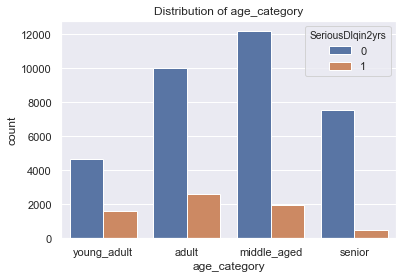

In [6]:
exploration.plot_count(credit, 'age_category', 'SeriousDlqin2yrs')

Most people are middle aged and then comes the adult. All of these categories have a larger proportion of people with a label '0'. Adult has more people labeled '1' than middle aged people.

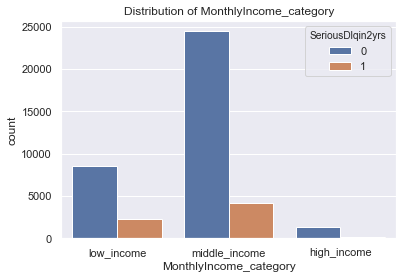

In [7]:
exploration.plot_count(credit, 'MonthlyIncome_category', 'SeriousDlqin2yrs')

Most people are in middle income group. People labeled '0' are the majority in all categories. Of the note is that people in high income group are all with label '0', which means that none of them  experienced 90 days past due delinquency or worse.

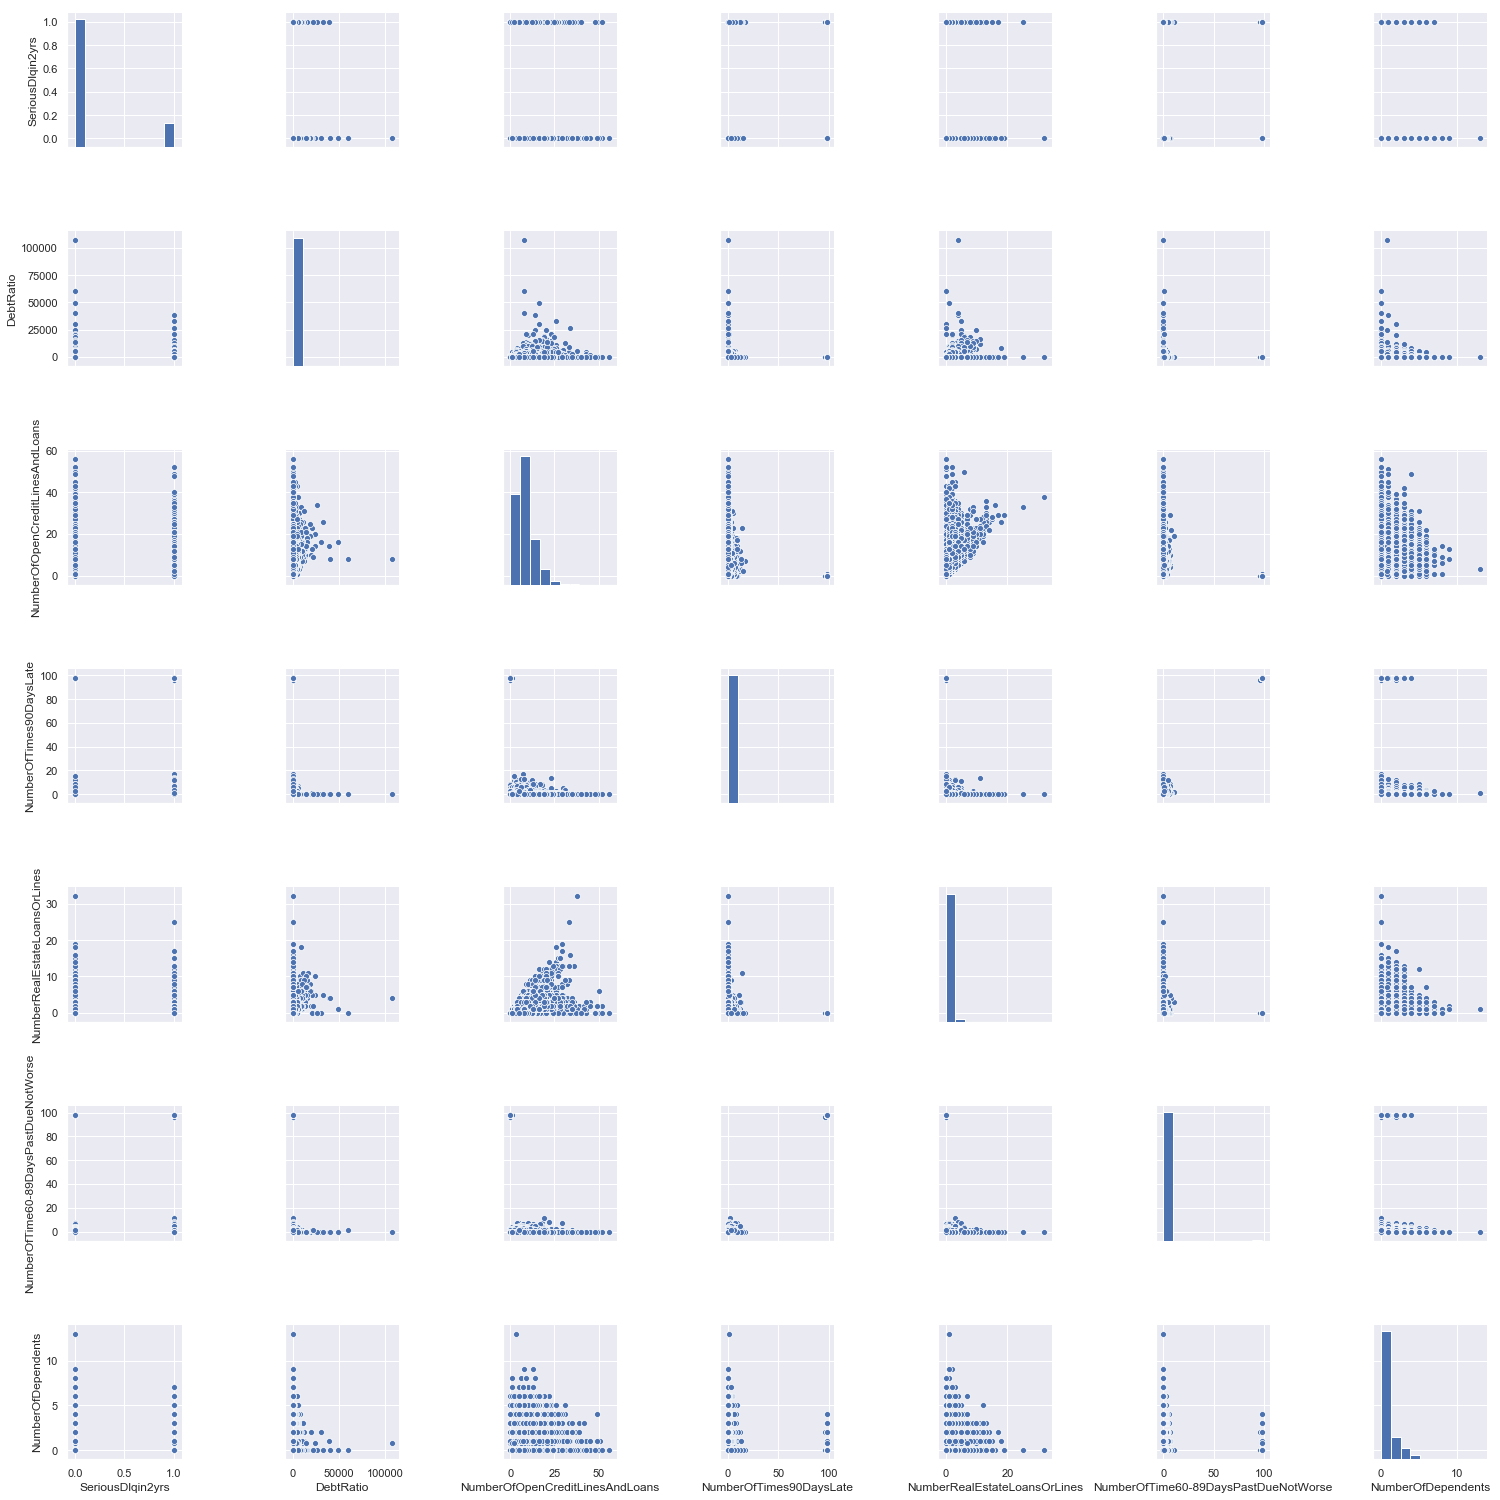

In [8]:
cont = credit[['SeriousDlqin2yrs', 'DebtRatio','NumberOfOpenCreditLinesAndLoans',
           'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
           'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]

exploration.plot_pair(cont)

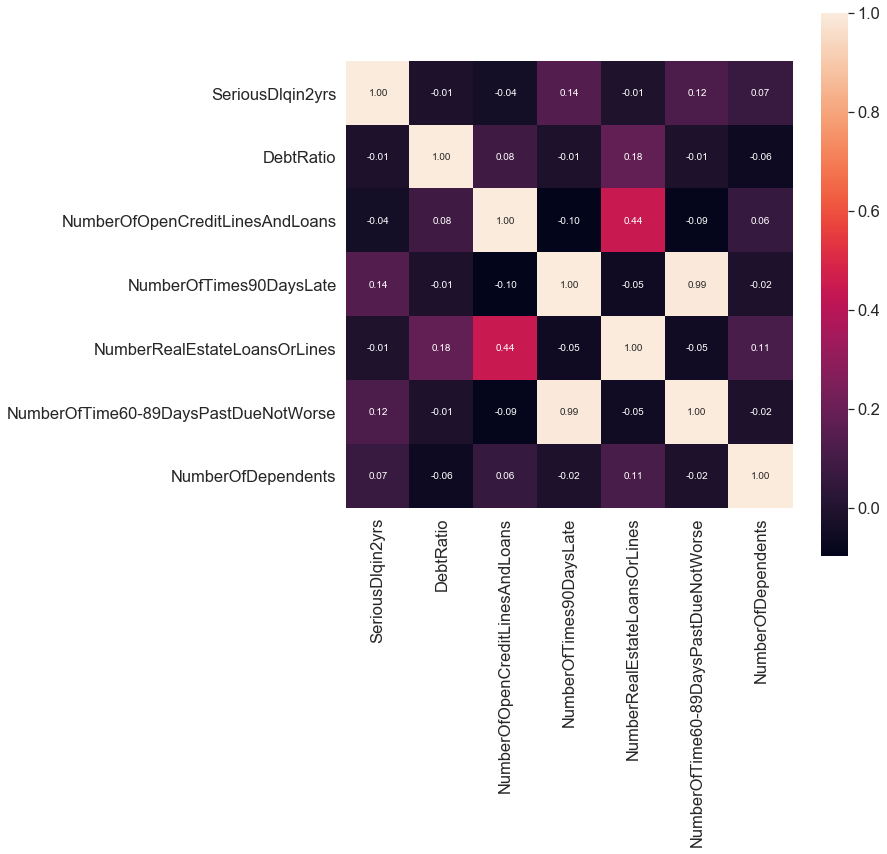

In [9]:
exploration.plot_heatmap(cont)

According to the pair plot and the correlation matrix, the continuous variable are weakly correlated with outcome. So, it might not be a good choice to choose regression here and instead I choose decision tree. In addition, the distribution of each feature is skewed. 

# Choose features and outcome
* Choose certain features of interest
* Normalize those features (included in preprocess_feature())

In [10]:
feature_names = ['DebtRatio',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'young_adult', 'adult', 'middle_aged', 'senior',
       'low_income', 'middle_income', 'high_income']
X = modeling_and_evaluation.preprocess_feature(credit, feature_names)
y = credit['SeriousDlqin2yrs'].values

# Modeling and evaluation
* split the data set into train set and test set
* fit the model (Decision Tree with different max depth)
* evaluate the decision tree with different max depth by jaccard index and F1 score report

In [11]:
X_train, X_test, y_train, y_test = modeling_and_evaluation.split_data(X, y, 0.3)

Train set: (28711, 13) (28711,)
Test set: (12305, 13) (12305,)


In order to prevent arbitrary choice of threshold to determine the predicted labels, I include a get_label() function in modeling_and_evaluation module. Here I use 0.4 as the threshold. And I tried different max_depth to build the model. In the future, this pipeline can be modified to play around different choices of parameters as well as threshold. 

In [12]:
best_tree = modeling_and_evaluation.fit_and_evaluation(X_train, y_train, X_test, y_test)
best_tree

evaluation for max_depth = 3:

    jaccard index for DT: 0.868
    F1 score report for DT:
              precision    recall  f1-score   support

          0       0.90      0.94      0.92     10328
          1       0.61      0.48      0.54      1977

avg / total       0.86      0.87      0.86     12305

evaluation for max_depth = 4:

    jaccard index for DT: 0.872
    F1 score report for DT:
              precision    recall  f1-score   support

          0       0.90      0.95      0.93     10328
          1       0.65      0.44      0.53      1977

avg / total       0.86      0.87      0.86     12305

evaluation for max_depth = 5:

    jaccard index for DT: 0.871
    F1 score report for DT:
              precision    recall  f1-score   support

          0       0.90      0.95      0.92     10328
          1       0.63      0.47      0.54      1977

avg / total       0.86      0.87      0.86     12305

evaluation for max_depth = 6:

    jaccard index for DT: 0.871
    F1 score rep

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The max_depth=4 has the highest jaccard index and the highest average F1 score. Decision Tree did not perform well in the recall of label 1. It is a common problem for unbalanced classes. But overall it did well in other evaluation metrics and the performance did not vary a lot across different max_depth. We can also find that higher max_depth does not improve the evaluation performance.